# Information Theory: I. Entropy 

## LIB: entropy in wireless.infotheory
- Testing code in my library
- Notice that python code can be invoked in Sage notebook with Python language (not Sage grammar, which is a little different from Python one). The following code are, however, assumed to use Sage garmmar in notebook. 

Not defined X
Σ_p -p*log(p)/log(2)
Defined pdf of X = [p, 1-p]
Plot Entropy


-p*log(p)/log(2) + (p - 1)*log(-p + 1)/log(2)

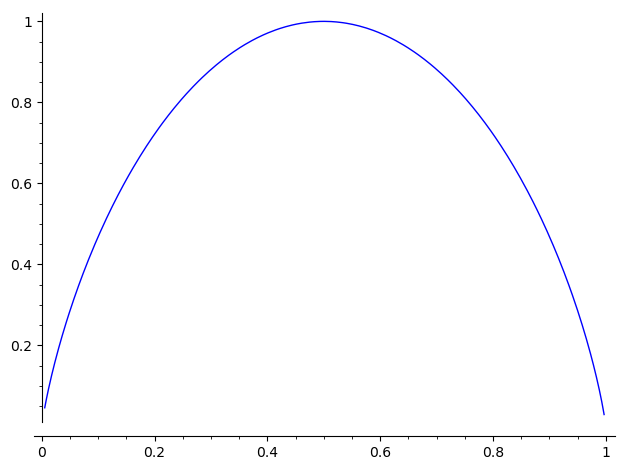

Maximum point


-log(p)/log(2) + log(-p + 1)/log(2)

verbose 0 (3791: plot.py, generate_plot_points) WARNING: When plotting, failed to evaluate function at 101 points.
verbose 0 (3791: plot.py, generate_plot_points) Last error message: 'Unable to compute f(1.0)'


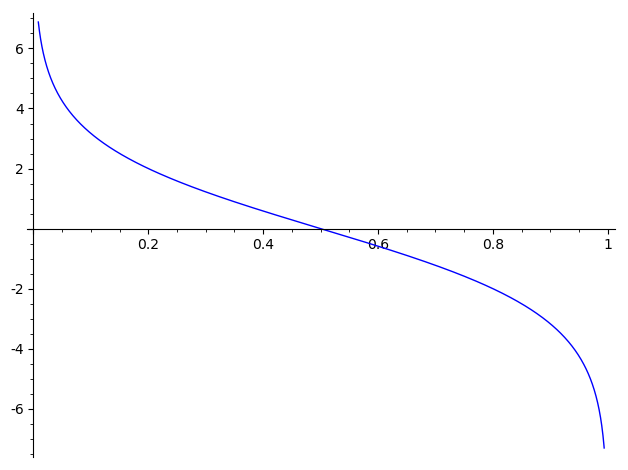

Defined pdf of X = [1/2, 1/2]
Entropy: H(X)


0.6931471805599453/log(2)

In [1]:
from wireless.infotheory import entropy
entropy.test_010()
entropy.test_020()
entropy.test_030()

## Code

Not defined X
Σ_p -p*log(p)/log(2)
Defined pdf of X = [p, 1-p]
Plot Entropy


-p*log(p)/log(2) + (p - 1)*log(-p + 1)/log(2)

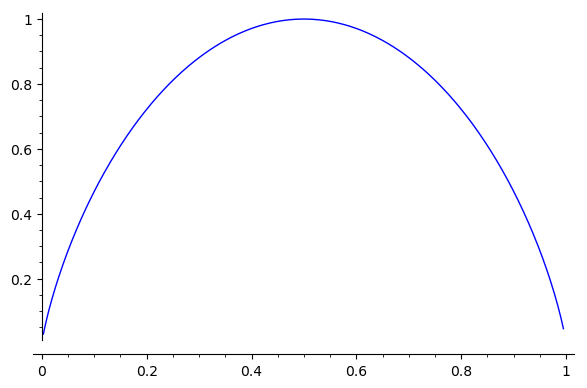

Maximum point


-log(p)/log(2) + log(-p + 1)/log(2)

verbose 0 (3791: plot.py, generate_plot_points) WARNING: When plotting, failed to evaluate function at 101 points.
verbose 0 (3791: plot.py, generate_plot_points) Last error message: 'Unable to compute f(1.0)'


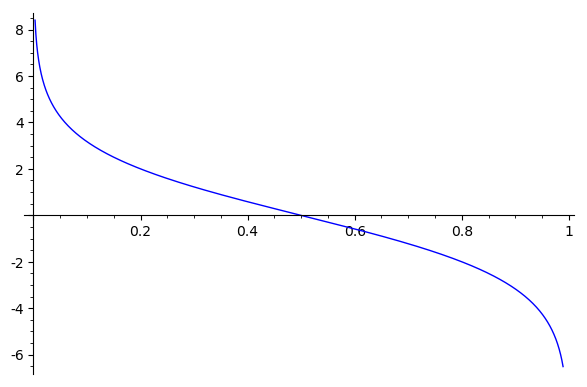

Defined pdf of X = [1/2, 1/2]
Entropy: H(X)


1

In [7]:
class DRV:
    # descrete random variable
    def __init__(self, P=None):
        self.p = var('p')
        self.P = P # not define yet

class SUM:
    def __init__(self, f, p, P=None):
        self.f = f # function
        self.p = p # argument for sum
        self.P = P # all p
    
    def __repr__(self):
        if self.P is None:
            return f'Σ_{self.p} {self.f}'
        else:
            return f'Σ_{self.p} {self.f} in {self.P}'
        
    def __str__(self):
        return self.__repr__()
    
    def calc(self):
        if self.P is not None:
            H = 0
            for p in self.P:
                H += self.f(p=p)
            return H
        else:
            return self
        
def H(X):
    """
    Caculate entropy of descrete random variable X
    """
    f = -X.p*log(X.p,2) # use log2 for bits
    if X.P is None:
        return SUM(f, X.p, X.P)
    else:
        return SUM(f, X.p, X.P).calc().simplify()

def test_010():
    print('Not defined X')
    X = DRV()
    print(H(X))

def test_020():
    print('Defined pdf of X = [p, 1-p]')
    p = var('p')
    X = DRV([p, 1-p])
    Hx = H(X)

    print('Plot Entropy')
    pretty_print(Hx)
    p = plot(Hx,p,0,1)
    show(p)
    
    print('Maximum point')
    pretty_print(diff(Hx))
    p = plot(diff(Hx,p,0,1))
    show(p)
    
def test_030():
    print('Defined pdf of X = [1/2, 1/2]')
    X = DRV([Rational('1/2'), Rational('1/2')]) # for Python compatibility
    Hx = H(X)

    print('Entropy: H(X)')
    pretty_print(Hx)
    
    
test_010()
test_020()
test_030()